Analysis of Tuberculosis Shenzhen dataset

In [1]:
import pandas as pd
shenzhen_metadata = pd.read_csv("/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/tuberculosis-chest-xrays-shenzhen/shenzhen_metadata.csv")
shenzhen_metadata.head()

,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal


In [2]:
print(shenzhen_metadata.info())
labels = shenzhen_metadata['findings'].unique()
print(labels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   study_id  662 non-null    object
 1   sex       662 non-null    object
 2   age       662 non-null    int64 
 3   findings  662 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.8+ KB
None
['normal' 'STB' 'TB' 'PTB in the left lower field'
 'Bilateral secondary PTB , right pleural change after decortication'
 'bilateral PTB ?right pleurisy with pleural effusion'
 'PTB in the left upper field' 'secondary PTB in the right upper field'
 'secondary PTB in the bilateral upper field'
 'PTB in the right upper field' 'bilateral PTB'
 'secondary PTB  in the right upper field'
 'bilateral PTB,right upper field atelectasis' 'Bilateral secondary PTB'
 'Bilateral secondary PTB, left encapsulated intrathoracic fluid'
 'PTB in the right lower field' 'Right PTB'
 'Left PTB, left pleural thickening'
 'PTB i

In [4]:
import plotly.express as px
# Assuming 'montgomery_metadata' is a DataFrame with the 'age' column
ages = shenzhen_metadata['age'].value_counts().reset_index()
print(ages)
ages.columns = ['Age', 'Count']

# Create the bar chart using Plotly
fig = px.bar(ages, x='Age', y='Count', 
             title='Age Distribution',
             labels={'Age': 'Age', 'Count': 'Count'},
             hover_data={'Age': True, 'Count': True})

# Show the figure
fig.show()


    age  count
0    28     33
1    25     32
2    24     29
3    39     25
4    23     25
..  ...    ...
71   70      1
72   89      1
73   71      1
74   82      1
75   76      1

[76 rows x 2 columns]


In [5]:
#Plot the age group of the patients that are not normal
not_normal = shenzhen_metadata[shenzhen_metadata['findings'] != 'normal']
not_normal = not_normal['age'].value_counts().reset_index()
not_normal.columns = ['Age', 'Count']

# Create the bar chart using Plotly
fig = px.bar(not_normal, x='Age', y='Count', 
             title='Not Normal Age Distribution',
             labels={'Age': 'Age', 'Count': 'Count'},
             hover_data={'Age': True, 'Count': True})

# Show the figure
fig.show()


#Plot the age group of the patients that are normal
normal = shenzhen_metadata[shenzhen_metadata['findings'] == 'normal']
normal = normal['age'].value_counts().reset_index()
normal.columns = ['Age', 'Count']

# Create the bar chart using Plotly
fig = px.bar(normal, x='Age', y='Count', 
             title='Normal Age Distribution',
             labels={'Age': 'Age', 'Count': 'Count'},
             hover_data={'Age': True, 'Count': True})
fig.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the images
normal_image_path = "/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/tuberculosis-chest-xrays-shenzhen/images/CHNCXR_0001_0.png"
abnormal_image_path = "/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/tuberculosis-chest-xrays-montgomery/images/MCUCXR_0399_1.png"  # Replace with actual abnormal image

image_normal = Image.open(normal_image_path)
image_abnormal = Image.open(abnormal_image_path)

# Sample metadata for demonstration
montgomery_metadata = {
    "findings": ["Normal", "large infiltrate RUL with cavitation plus infiltrate in RML. consistent with active cavitary TB"]
}

# Get image dimensions
width, height = image_normal.size
print(f"Image Dimensions: {width}x{height}")

# Create figure
plt.figure(figsize=(12, 6))

# Show first image (Normal)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(image_normal)
plt.title("Normal")
plt.axis("off")

# Show second image (Abnormal)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(image_abnormal)
plt.title(montgomery_metadata["findings"][1])  # "Tuberculosis"
plt.axis("off")

plt.show()


Image Analysis of Chest Xray

Study ID: CHNCXR_0348_1.png
Image Dimensions: 2485x2787


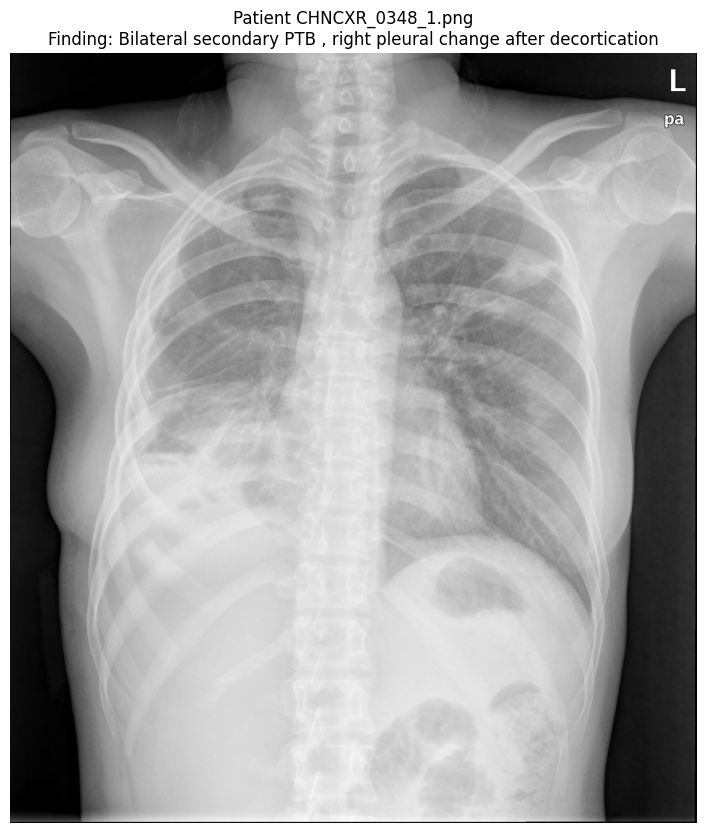

Study ID: CHNCXR_0001_0.png
Image Dimensions: 2485x2787


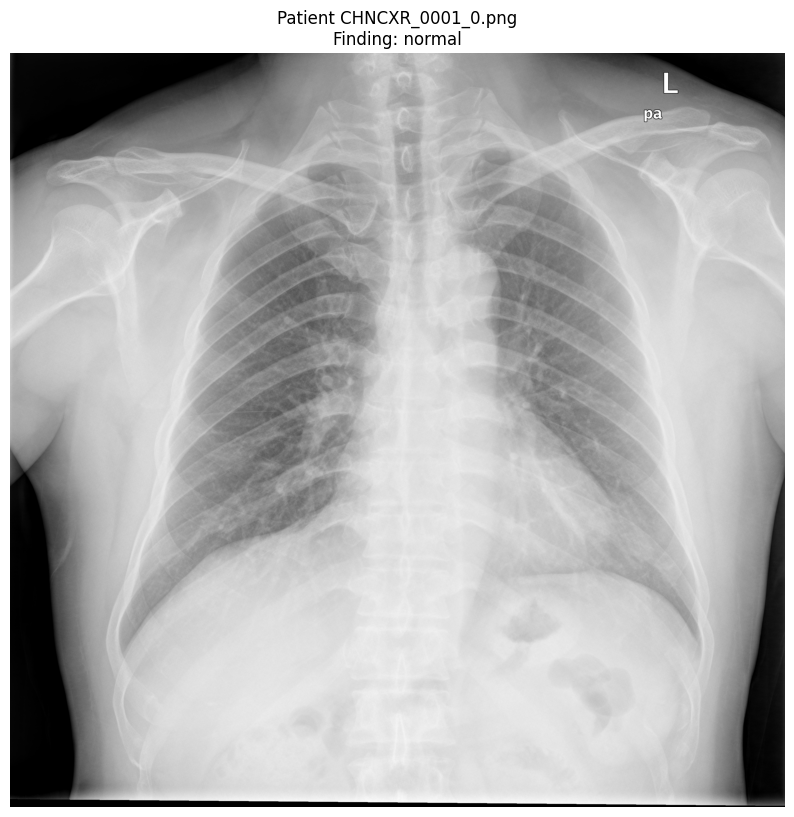

In [6]:

# Find the study_id for the patient with the specific finding
specific_finding = "Bilateral secondary PTB , right pleural change after decortication"
patient_info = shenzhen_metadata[shenzhen_metadata['findings'] == specific_finding]
study_id = patient_info['study_id'].values[0]
print(f"Study ID: {study_id}")

# Load and display the image
from PIL import Image
import matplotlib.pyplot as plt

image_path = f"/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/tuberculosis-chest-xrays-shenzhen/images/{study_id}"
image = Image.open(image_path)
# Get image dimensions
width, height = image.size
print(f"Image Dimensions: {width}x{height}")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title(f"Patient {study_id}\nFinding: {specific_finding}")
plt.axis("off")
plt.show()

# Find the study_id for the patient with  normal chest xray
# Find the study_id for the patient with the specific finding
specific_finding = "normal"
patient_info = shenzhen_metadata[shenzhen_metadata['findings'] == specific_finding]
study_id = patient_info['study_id'].values[0]
print(f"Study ID: {study_id}")

# Load and display the image
from PIL import Image
import matplotlib.pyplot as plt

# Get image dimensions
width, height = image.size
print(f"Image Dimensions: {width}x{height}")

image_path = f"/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/tuberculosis-chest-xrays-shenzhen/images/{study_id}"
image = Image.open(image_path)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title(f"Patient {study_id}\nFinding: {specific_finding}")
plt.axis("off")
plt.show()
